<a href="https://colab.research.google.com/github/yarin638/erlang/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import skimage
from skimage.metrics import structural_similarity as ssim
import warnings
warnings.filterwarnings("ignore")

a) display hibiscus2.tiff:

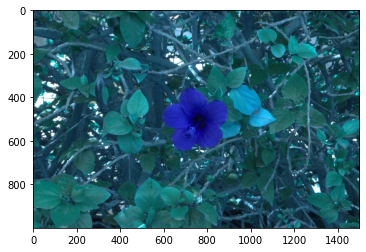

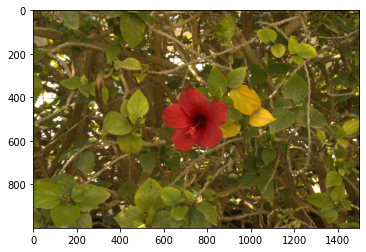

In [ ]:

img = cv2.imread("hibiscus2.tiff")
plt.imshow(img)
plt.show()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

b)

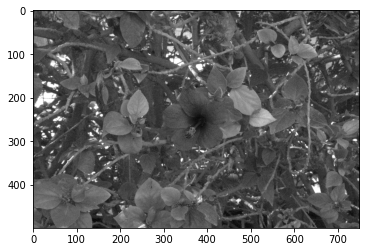

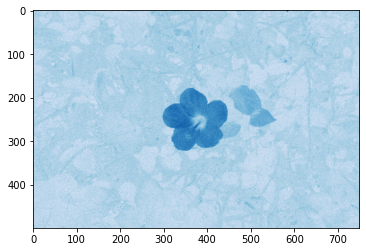

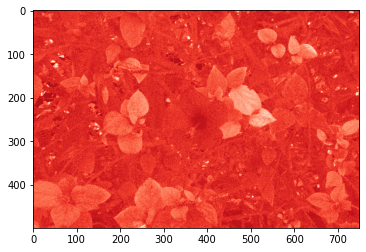

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
img_subsampled = img_ycbcr[::2, ::2, :]

y = img_subsampled[:,:,0]
cb = img_subsampled[:,:,1]
cr = img_subsampled[:,:,2]


plt.imshow(y, cmap="gray")
plt.show()
plt.imshow(cb, cmap="Blues")
plt.show()
plt.imshow(cr, cmap="Reds")
plt.show()

c)

In [ ]:
y_sample=y[::2,::2]
cb_sample=cb[::2,::2]
cr_sample=cr[::2,::2]

width=int(y_sample.shape[0]*2)
highet=int(y_sample.shape[1]*2)
y_resize=cv2.resize(y_sample,(highet,width))
cb_resize=cv2.resize(cb_sample,(highet,width))
cr_resize=cv2.resize(cr_sample,(highet,width))
print("Psnr:")
print(cv2.PSNR(y,y_resize))
print(cv2.PSNR(cb,cb_resize))
print(cv2.PSNR(cr,cr_resize))
(score1, diff1) = ssim(y, y_resize, full=True)
(score2, diff2) = ssim(cb, cb_resize, full=True)
(score3, diff3) = ssim(cr, cr_resize, full=True)
print("SSIM:")
print(score1)
print(score2)
print(score3)

Psnr:
26.764878480964462
31.278629096714493
29.791846037487755
SSIM:
0.7588633931261215
0.6388502210648866
0.6231063079447895


d)chorma sub sample is a technique used in order to compress the a video or a picture sent on any network, the idea behind the technique is that the humen eye is more senstive to changes in brightness then changes in coloer which means that in a picture the information about the coloer is less crucial then the informtion of the brightness. 
that allow us to send only part of the information about a picture (give up on some of the coloer information ,up to 50% less data sent in 4:2:0)
and keep similar level of quality.
the technique was invented in 1950 when the need to comprass the picture had raised in order to be able to use coloer tv with the limitations on the bandwidth at the time. 

e)accroding to JCTVC-W0105  using chroma subsampling always decreases the accuracy of color reproduction.
at high and medium bit rates the the compression
efficiency is reduced when using chroma subsampling and so at this bit rates the provider of the pictures/video may want to consider using 4:4:4 (which means no to use chroma subsampling at all) and in slow bit rates chroma subsampling is more efficnet. 

f)

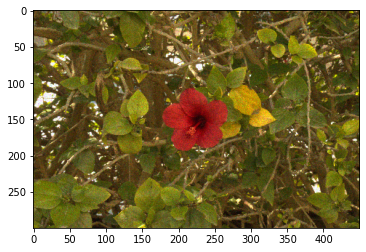

Psnr:
ssim
6.161475070231907e-05


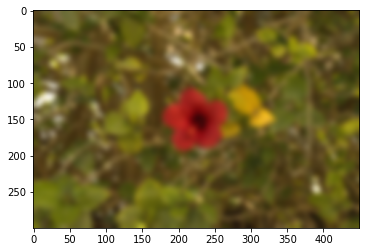

Psnr:
9.37717144659169
ssim
6.463206973919281e-06


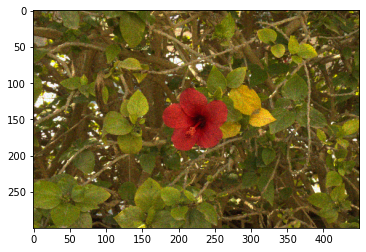

Psnr:
9.380143092179202
ssim
6.15575192845647e-05


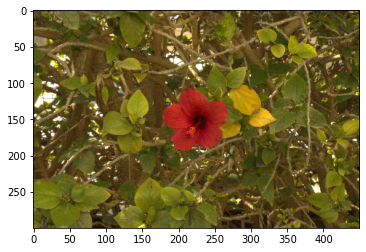

Psnr:
9.380248601122616
ssim
6.181314117738021e-05


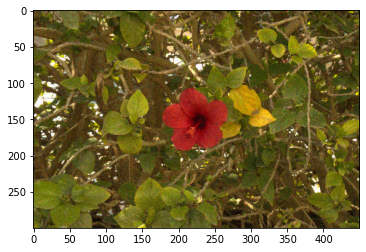

Psnr:
9.380185292772747
ssim
6.174990359551393e-05


In [ ]:
img_rgb = cv2.resize(img_rgb, dsize=(0, 0), fx=0.3, fy=0.3)
mode='speckle'
noised_img1 = skimage.util.random_noise(image=img_rgb, mode='speckle', seed=None, clip=True, var=0.01, mean=0)

blur = cv2.GaussianBlur(img_rgb, (17, 17), cv2.BORDER_DEFAULT)
noised_img2 = skimage.util.random_noise(image=blur, mode='gaussian', seed=None, clip=True, var=0, mean=0)

noised_img3 = skimage.util.random_noise(image=img_rgb, mode=mode)
  
noised_img4 = skimage.util.random_noise(image=img_rgb, mode='gaussian', seed=None, clip=True, var=0, mean=0)

noised_img5 = skimage.util.random_noise(image=img_rgb, mode='poisson', seed=42, clip=True)
plt.imshow(noised_img1)
plt.show()
print("Psnr:")
print(skimage.metrics.peak_signal_noise_ratio(img_rgb,noised_img1))
(score1, diff1) = ssim(noised_img1, img_rgb, full=True,channel_axis=-1,multichannel=True)
print("ssim")
print(score1)


plt.imshow(noised_img2)
plt.show()
print("Psnr:")
print(float(skimage.metrics.peak_signal_noise_ratio(img_rgb,noised_img2)))
(score2, diff1) = ssim(noised_img2, img_rgb, full=True,channel_axis=-1,multichannel=True)
print("ssim")
print(score2)

plt.imshow(noised_img3)
plt.show()
print("Psnr:")
print(float(skimage.metrics.peak_signal_noise_ratio(img_rgb,noised_img3)))
(score3, diff1) = ssim(noised_img3, img_rgb, full=True,channel_axis=-1,multichannel=True)
print("ssim")
print(score3)

plt.imshow(noised_img4)
plt.show()
print("Psnr:")
print(float(skimage.metrics.peak_signal_noise_ratio(img_rgb,noised_img4)))
(score4, diff1) = ssim(noised_img4, img_rgb, full=True,channel_axis=-1,multichannel=True)
print("ssim")
print(score4)


plt.imshow(noised_img5)
plt.show()
print("Psnr:")
print(float(skimage.metrics.peak_signal_noise_ratio(img_rgb,noised_img5)))
(score5, diff1) = ssim(noised_img5, img_rgb, full=True,channel_axis=-1,multichannel=True)
print("ssim")
print(score5)
